# Population Dynamics and Model Building

*This project was developed as part of the course **Mathematical Modeling for Biology** at the **University of Milan**.*

### Lotka-Volterra Predator-Prey Model

The Lotka-Volterra equations describe predator-prey interactions through a system of differential equations:

\[
\begin{aligned}
\frac{dX}{dt} &= aX - bXY \quad &a,b > 0 \\
\frac{dY}{dt} &= -cY + dXY \quad &c,d > 0
\end{aligned}
\]

Where:
- \(X\): prey population  
- \(Y\): predator population  
- \(a\): prey reproduction rate  
- \(b\): predation rate  
- \(c\): predator death rate  
- \(d\): growth rate of predator due to predation  

---

### Project Objectives

1. **Classic Lotka-Volterra Simulation**  
   Simulate the basic predator-prey system and analyze the oscillatory behavior of both populations over time and in phase space.

2. **Logistic Lotka-Volterra Extension**  
   Introduce a carrying capacity \(K\) to the prey population to simulate resource limitations, and compare dynamics to the original model.

3. **Fixed Point and Vector Field Analysis**  
   Compute equilibrium points and visualize vector fields using stream plots, highlighting the speed and direction of population changes.

4. **Three-Species Food Chain Model**  
   Add a third species — an *uber-predator* — that preys on the intermediate predator. Fit this extended model to real-world-like data using parameter optimization.

5. **Bonus: Evolutionary Dynamics with Competing Prey**  
   Model the emergence of a second, evolved prey species. Analyze its competition with the original prey under shared resource constraints, and evaluate long-term outcomes such as extinction or coexistence.




### Classic Lotka-Volterra Simulation

We simulate predator-prey population dynamics over time using the Lotka-Volterra equations with chosen parameters. This results in characteristic oscillatory behavior.


In [2]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize

# Lotka-Volterra parameters
a, b, c, d = 0.899, 0.300, 0.798, 0.548

# Define the Lotka-Volterra model
def lotka_volterra(y, t, a, b, c, d):
    X, Y = y
    dXdt = a * X - b * X * Y
    dYdt = -c * Y + d * X * Y
    return [dXdt, dYdt]

# Time range
t = np.linspace(0, 50, 700)

# Integrate the system
initial_conditions = (5.0, 3.0)
lv_model = integrate.odeint(lotka_volterra, initial_conditions, t, args=(a, b, c, d))
X, Y = lv_model.T


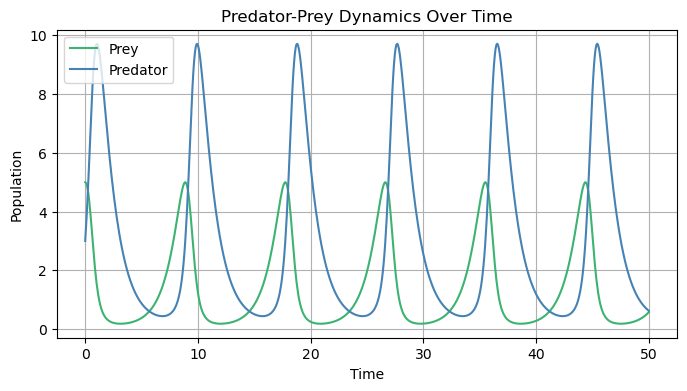

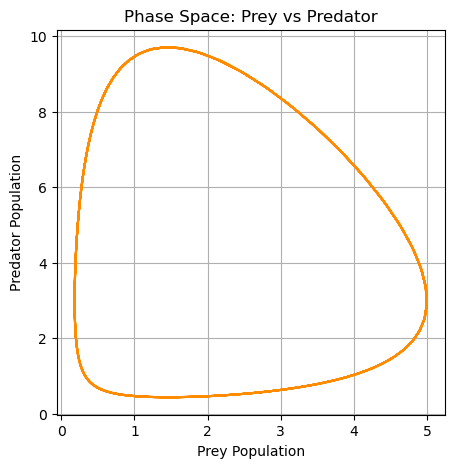

In [3]:
# Plot populations over time
plt.figure(figsize=(8, 4))
plt.plot(t, X, label='Prey', color='mediumseagreen')
plt.plot(t, Y, label='Predator', color='steelblue')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Dynamics Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Phase-space plot (prey vs predator)
plt.figure(figsize=(5, 5))
plt.plot(X, Y, color='darkorange')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Space: Prey vs Predator')
plt.grid(True)
plt.show()


### Logistic Lotka-Volterra Model

We extend the original model to include a carrying capacity \(K\) for the prey population, introducing a natural limit to growth.


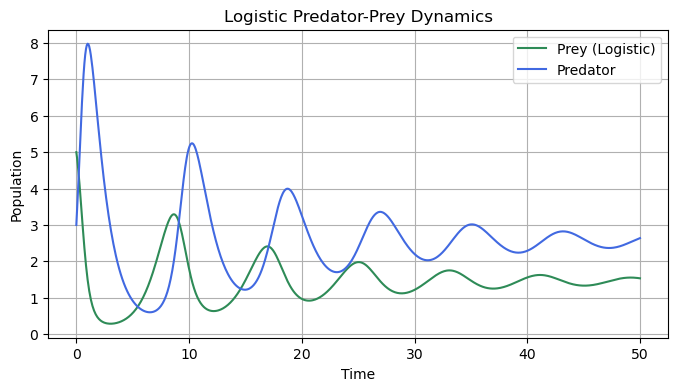

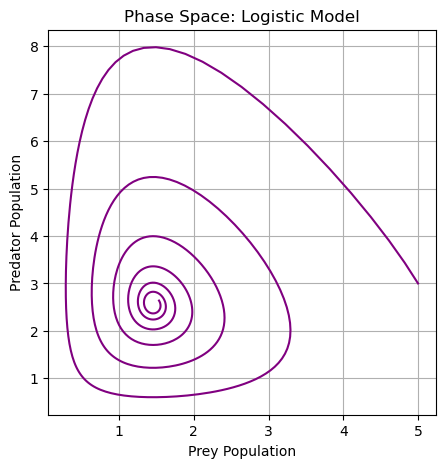

In [4]:
# Logistic Lotka-Volterra model with carrying capacity
K = 10
def lotka_volterra_logistic(y, t, a, b, c, d, K):
    X, Y = y
    dXdt = a * (1 - X / K) * X - b * X * Y
    dYdt = -c * Y + d * X * Y
    return [dXdt, dYdt]

# Simulate logistic model
lv_model_log = integrate.odeint(lotka_volterra_logistic, initial_conditions, t, args=(a, b, c, d, K))
X_log, Y_log = lv_model_log.T

# Plot populations over time (logistic model)
plt.figure(figsize=(8, 4))
plt.plot(t, X_log, label='Prey (Logistic)', color='seagreen')
plt.plot(t, Y_log, label='Predator', color='royalblue')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic Predator-Prey Dynamics')
plt.legend()
plt.grid(True)
plt.show()

# Phase-space plot
plt.figure(figsize=(5, 5))
plt.plot(X_log, Y_log, color='purple')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Space: Logistic Model')
plt.grid(True)
plt.show()


### Fixed Points

We estimate the non-trivial fixed points (equilibrium states) numerically using `fsolve`. These are points where both prey and predator populations remain constant.


In [8]:
# Wrapper functions without time parameter
def lotka_volterra_fixed(y, a, b, c, d):
    X, Y = y
    dXdt = a * X - b * X * Y
    dYdt = -c * Y + d * X * Y
    return [dXdt, dYdt]

def lotka_volterra_logistic_fixed(y, a, b, c, d, K):
    X, Y = y
    dXdt = a * (1 - X / K) * X - b * X * Y
    dYdt = -c * Y + d * X * Y
    return [dXdt, dYdt]

# Use fsolve with proper arguments
initial_guess = [5.0, 3.0]
fixed_point_lv = optimize.fsolve(lotka_volterra_fixed, initial_guess, args=(a, b, c, d))
fixed_point_log = optimize.fsolve(lotka_volterra_logistic_fixed, initial_guess, args=(a, b, c, d, K))

print("Fixed point (Classic Lotka-Volterra):", fixed_point_lv)
print("Fixed point (Logistic Model):", fixed_point_log)



Fixed point (Classic Lotka-Volterra): [1.45620438 2.99666667]
Fixed point (Logistic Model): [1.45620438 2.56029075]


### Vector Field Visualization

We visualize the direction and speed of population changes in phase space using a streamplot. The color intensity reflects the rate of change. Fixed points are marked for reference.


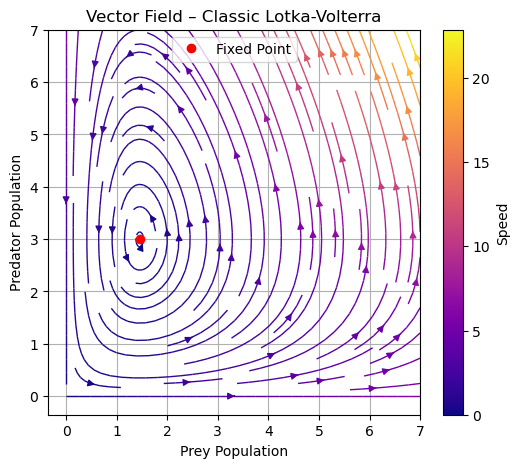

In [9]:
# Define a vectorized version of the system
x_vals = np.linspace(0, 7, 20)
y_vals = np.linspace(0, 7, 20)
x, y = np.meshgrid(x_vals, y_vals)

u = a * x - b * x * y
v = -c * y + d * x * y
speed = np.sqrt(u**2 + v**2)

# Plot the vector field
plt.figure(figsize=(6, 5))
plt.streamplot(x, y, u, v, color=speed, cmap='plasma', linewidth=1)
plt.plot(fixed_point_lv[0], fixed_point_lv[1], 'ro', label='Fixed Point')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Vector Field – Classic Lotka-Volterra')
plt.colorbar(label='Speed')
plt.legend()
plt.grid(True)
plt.show()


## Competitive Lotka-Volterra – Food Chain Extension

We extend the predator-prey model to include a third species: an *uber-predator* that preys on the weak predator. The full model becomes:

\[
\begin{aligned}
\frac{dX}{dt} &= a\left(1 - \frac{X}{K}\right)X - bXY \\
\frac{dY}{dt} &= dXY - hZY \\
\frac{dZ}{dt} &= fYZ - gZ
\end{aligned}
\]

Where:
- \(X\): prey  
- \(Y\): weak predator (feeds on prey)  
- \(Z\): uber-predator (feeds on weak predator)  
- \(K\): carrying capacity of prey  


In [10]:
# Define the 3-species food chain model
def food_chain(y, t, a, b, d, f, g, h, K):
    X, Y, Z = y    
    dXdt = a * (1 - X / K) * X - b * X * Y 
    dYdt = d * X * Y - h * Z * Y
    dZdt = f * Y * Z - g * Z
    return [dXdt, dYdt, dZdt]


### Data Overview

The dataset contains population counts for prey, weak predator, and uber-predator species over time. We will fit our model to this data.


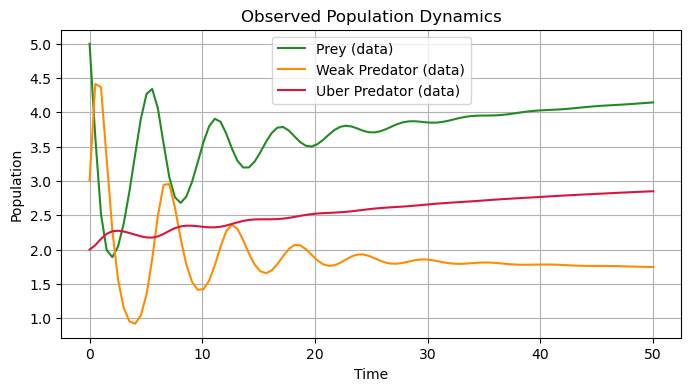

In [12]:
# Read and preview the data
ppu = ppu = pd.read_csv('lotka_volterra_prey-predator.csv')


# Plot raw data
plt.figure(figsize=(8, 4))
plt.plot(ppu['time'], ppu['prey'], label='Prey (data)', color='forestgreen')
plt.plot(ppu['time'], ppu['predator'], label='Weak Predator (data)', color='darkorange')
plt.plot(ppu['time'], ppu['uber_predator'], label='Uber Predator (data)', color='crimson')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Observed Population Dynamics')
plt.legend()
plt.grid(True)
plt.show()


### Model Fit

The model output aligns well with observed population trends for all three species.


In [13]:
# Define a scoring function for model fitting
def score_ppu(params, t):
    y0 = (5.0, 3.0, 2.0)  # initial populations
    X, Y, Z = integrate.odeint(food_chain, y0, t, args=tuple(params)).T
    return np.sum((X - ppu['prey'])**2 + (Y - ppu['predator'])**2 + (Z - ppu['uber_predator'])**2)


In [16]:
# TODO fit the model to the data
bounds=[(0.1,1.0),
        (0.1,1.0),    
        (0.1,1.0),
        (0.1,1.0),
        (0.1,1.0),
        (0.1,1.0),
        (5.0,15.0)
]
minimization = optimize.minimize(score_ppu,(a,b,d,f,g,h, K), ppu['time'], bounds=bounds)
minimization
a,b,d,f,g,h, K = minimization.x
competitive_lv = integrate.odeint(food_chain,(5.0,3.0,2.0),ppu['time'],args=tuple(minimization.x))
X,Y,Z= competitive_lv.T
minimization.x


array([1.        , 0.31166304, 0.42543053, 0.1       , 0.18243354,
       0.59513538, 8.8477649 ])

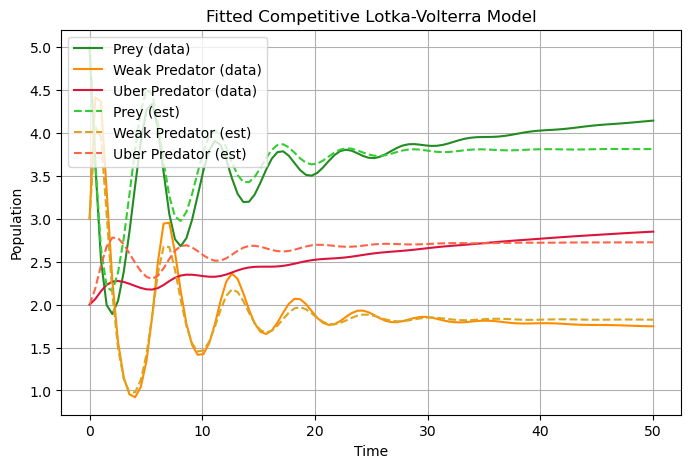

In [17]:
# Plot observed vs estimated
plt.figure(figsize=(8, 5))
plt.plot(ppu['time'], ppu['prey'], label='Prey (data)', color='forestgreen')
plt.plot(ppu['time'], ppu['predator'], label='Weak Predator (data)', color='darkorange')
plt.plot(ppu['time'], ppu['uber_predator'], label='Uber Predator (data)', color='crimson')

plt.plot(ppu['time'], X, '--', label='Prey (est)', color='limegreen')
plt.plot(ppu['time'], Y, '--', label='Weak Predator (est)', color='goldenrod')
plt.plot(ppu['time'], Z, '--', label='Uber Predator (est)', color='tomato')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Fitted Competitive Lotka-Volterra Model')
plt.legend()
plt.grid(True)
plt.show()


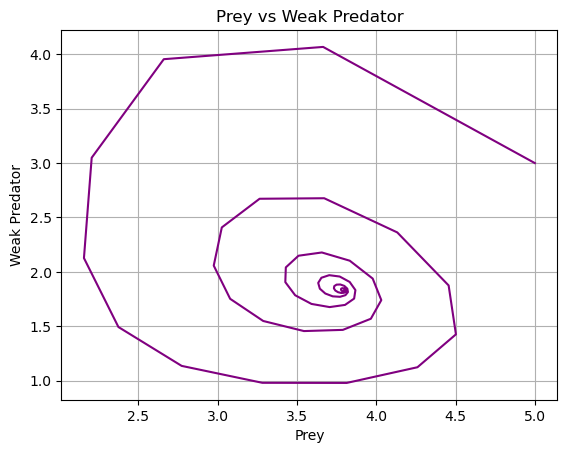

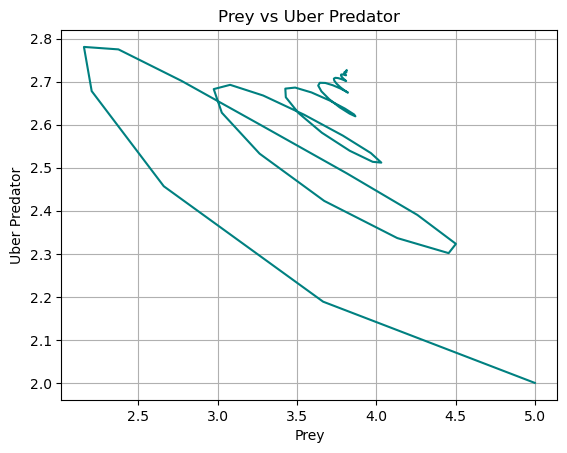

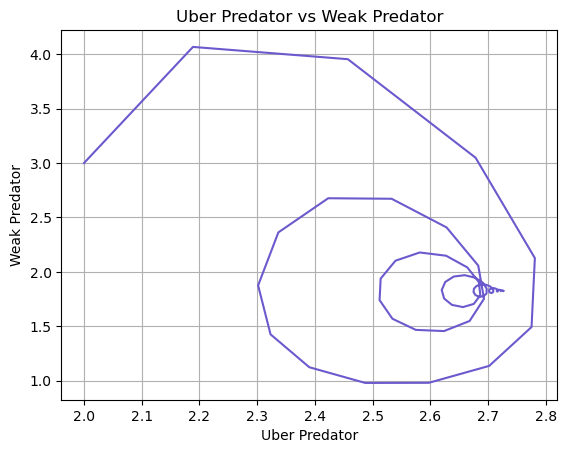

In [18]:
# Pairwise phase-space plots
plt.plot(X, Y, color='purple')
plt.xlabel('Prey')
plt.ylabel('Weak Predator')
plt.title('Prey vs Weak Predator')
plt.grid(True)
plt.show()

plt.plot(X, Z, color='teal')
plt.xlabel('Prey')
plt.ylabel('Uber Predator')
plt.title('Prey vs Uber Predator')
plt.grid(True)
plt.show()

plt.plot(Z, Y, color='slateblue')
plt.xlabel('Uber Predator')
plt.ylabel('Weak Predator')
plt.title('Uber Predator vs Weak Predator')
plt.grid(True)
plt.show()


### Fixed Point Estimation

We compare the numerically estimated fixed point with the analytically computed one. The Euclidean distance between the two provides an accuracy measure of the model fit.


In [19]:
# Estimate fixed point from the model numerically
def food_chain_fixed(y, a, b, d, f, g, h, K):
    return food_chain(y, 0, a, b, d, f, g, h, K)

true_params = (1, 0.38127991, 0.35959962, 0.1, 0.18424863, 0.51028539, 13.40479442)
fixed_est = optimize.fsolve(food_chain_fixed, [5.0, 3.0, 2.0], args=true_params)

# Analytical fixed point
a_x, b_x, d_x, f_x, g_x, h_x, K_x = true_params
x_true = ((a_x - b_x) * (f_x / h_x)) * (K_x / a_x)
y_true = f_x / g_x
z_true = x_true * (h_x / d_x)

# Calculate Euclidean error
error = np.sqrt((x_true - fixed_est[0])**2 + (y_true - fixed_est[1])**2 + (z_true - fixed_est[2])**2)

print("Estimated Fixed Point:", fixed_est)
print("Analytical Fixed Point:", (x_true, y_true, z_true))
print("Euclidean Error:", error)


Estimated Fixed Point: [3.98788598 1.8424863  2.81027502]
Analytical Fixed Point: (1.6253288399994952, 0.5427448768547153, 2.3064027737220356)
Euclidean Error: 2.7431535237693514


## Bonus: Evolutionary Dynamics with Competing Prey

We introduce an evolved prey species \(W\) that shares ecological traits with the original prey \(X\), but is less vulnerable to predators. Evolution occurs unidirectionally from \(X \to W\), with shared carrying capacity and intra-prey interaction.

\[
\begin{aligned}
\frac{dX}{dt} &= a\left(1 - \frac{X + 0.5W}{K}\right)X - bXY - \text{evolve\_rate} \cdot X \\
\frac{dW}{dt} &= a\left(1 - \frac{0.5X + W}{K}\right)W - 0.5bWY + \text{evolve\_rate} \cdot X \\
\frac{dY}{dt} &= d(X + 0.5W)Y - hZY \\
\frac{dZ}{dt} &= fYZ - gZ
\end{aligned}
\]


In [20]:
# Bonus: Double Prey Competitive Lotka-Volterra Model
def food_chain_double_prey(y, t, a, b, d, f, g, h, K):
    X, W, Y, Z = y
    
    # Prey-prey competition: both share K, interact with 0.5 effect
    dXdt = a * (1 - (X + 0.5 * W) / K) * X - b * X * Y - 0.1 * X 
    dWdt = a * (1 - (0.5 * X + W) / K) * W - 0.5 * b * W * Y + 0.1 * X
    dYdt = d * (X + 0.5 * W) * Y - h * Z * Y
    dZdt = f * Y * Z - g * Z
    
    return [dXdt, dWdt, dYdt, dZdt]


In [22]:
# Time range for short simulation
t_short = np.linspace(0, 10, 300)

# Initial conditions: [X, W, Y, Z]
y0_bonus = [5.0, 0.0, 3.0, 2.0] 

# Use previous parameters
params = (a, b, d, f, g, h, K)

# Simulate the system
bonus_sim = integrate.odeint(food_chain_double_prey, y0_bonus, t_short, args=params)
X_b, W_b, Y_b, Z_b = bonus_sim.T


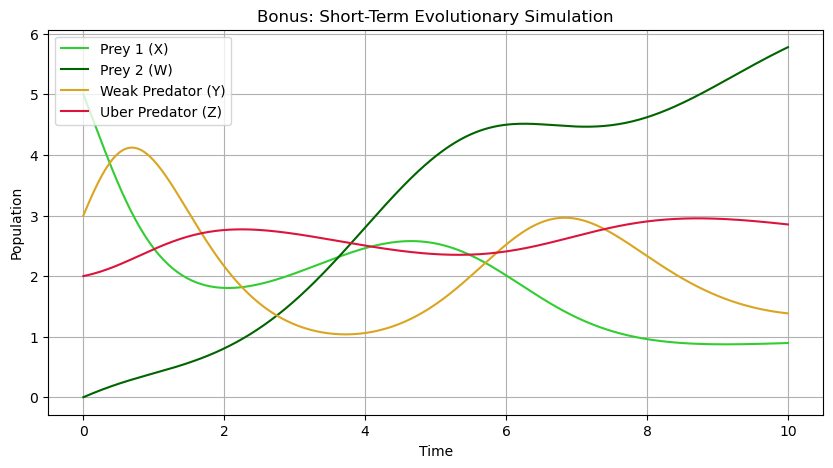

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(t_short, X_b, label='Prey 1 (X)', color='limegreen')
plt.plot(t_short, W_b, label='Prey 2 (W)', color='darkgreen')
plt.plot(t_short, Y_b, label='Weak Predator (Y)', color='goldenrod')
plt.plot(t_short, Z_b, label='Uber Predator (Z)', color='crimson')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Bonus: Short-Term Evolutionary Simulation')
plt.legend()
plt.grid(True)
plt.show()


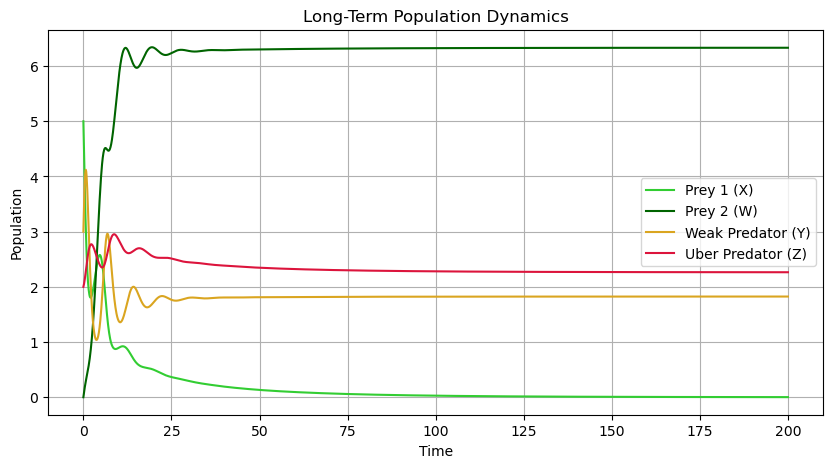

In [24]:
# Extended simulation to observe long-term trends
t_long = np.linspace(0, 200, 2000)
y0_bonus = [5.0, 0.0, 3.0, 2.0] 

bonus_long_sim = integrate.odeint(food_chain_double_prey, y0_bonus, t_long, args=params)
X_l, W_l, Y_l, Z_l = bonus_long_sim.T

# Plot all species over long time period
plt.figure(figsize=(10, 5))
plt.plot(t_long, X_l, label='Prey 1 (X)', color='limegreen')
plt.plot(t_long, W_l, label='Prey 2 (W)', color='darkgreen')
plt.plot(t_long, Y_l, label='Weak Predator (Y)', color='goldenrod')
plt.plot(t_long, Z_l, label='Uber Predator (Z)', color='crimson')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Long-Term Population Dynamics')
plt.legend()
plt.grid(True)
plt.show()


### Will a Species Go Extinct?

We cannot reliably infer extinction from a long simulation alone. Instead, we analyze the population derivatives near the end of the simulation to see if any species approaches zero **and stays low** while not increasing again.


In [25]:
# Check last values to assess extinction
threshold = 0.1
final_populations = [X_l[-1], W_l[-1], Y_l[-1], Z_l[-1]]
species = ['Prey 1 (X)', 'Prey 2 (W)', 'Weak Predator (Y)', 'Uber Predator (Z)']

for i, pop in enumerate(final_populations):
    status = "EXTINCT" if pop < threshold else "PRESENT"
    print(f"{species[i]}: {pop:.4f} → {status}")


Prey 1 (X): 0.0018 → EXTINCT
Prey 2 (W): 6.3319 → PRESENT
Weak Predator (Y): 1.8242 → PRESENT
Uber Predator (Z): 2.2645 → PRESENT
